In [358]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# # from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_squared_error

In [359]:
train = pd.read_csv('D:/coding stuff/Prodigy/Task 1/DATASET/train_1_2.csv')
test = pd.read_csv('D:/coding stuff/Prodigy/Task 1/DATASET/test_1_2.csv')

In [360]:
train.head()

,Id,LotFrontage,FullBath,BedroomAbvGr,SalePrice
0,1,65,2,3,208500
1,2,80,2,3,181500
2,3,68,2,3,223500
3,4,60,1,3,140000
4,5,84,2,4,250000


In [361]:
train['SalePrice'].describe()

count      1201.000000
mean     180770.480433
std       83389.519866
min       34900.000000
25%      127500.000000
50%      159500.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Figure size 640x480 with 0 Axes>

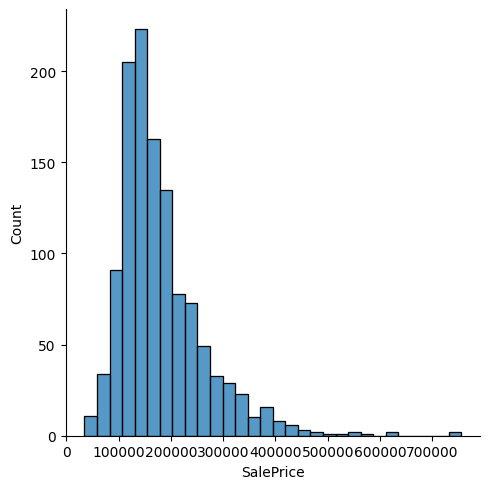

In [362]:
#House price distribution
y = train['SalePrice']
plt.figure(1)
sns.displot(y, kde=False,bins=30)
plt.show()

In [363]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Id            1201 non-null   int64
 1   LotFrontage   1201 non-null   int64
 2   FullBath      1201 non-null   int64
 3   BedroomAbvGr  1201 non-null   int64
 4   SalePrice     1201 non-null   int64
dtypes: int64(5)
memory usage: 47.0 KB


In [364]:
# select the numerical variables
train_numerical = train.select_dtypes(exclude='object')
train_numerical.shape

(1201, 5)

In [365]:
# correlation coefficient of each variable
corr = train_numerical.corr()

# correlation coefficent between predictor variables and 'SalePrice'
corr_target = corr['SalePrice']

# show the correlation coefficent between predictor variables and 'SalePrice'
corr_target.sort_values(ascending=False)

SalePrice       1.000000
FullBath        0.566800
LotFrontage     0.351799
BedroomAbvGr    0.164554
Id             -0.036776
Name: SalePrice, dtype: float64

In [366]:
corr_target = corr_target[corr_target >0] 
corr_target.sort_values(ascending=False)

SalePrice       1.000000
FullBath        0.566800
LotFrontage     0.351799
BedroomAbvGr    0.164554
Name: SalePrice, dtype: float64

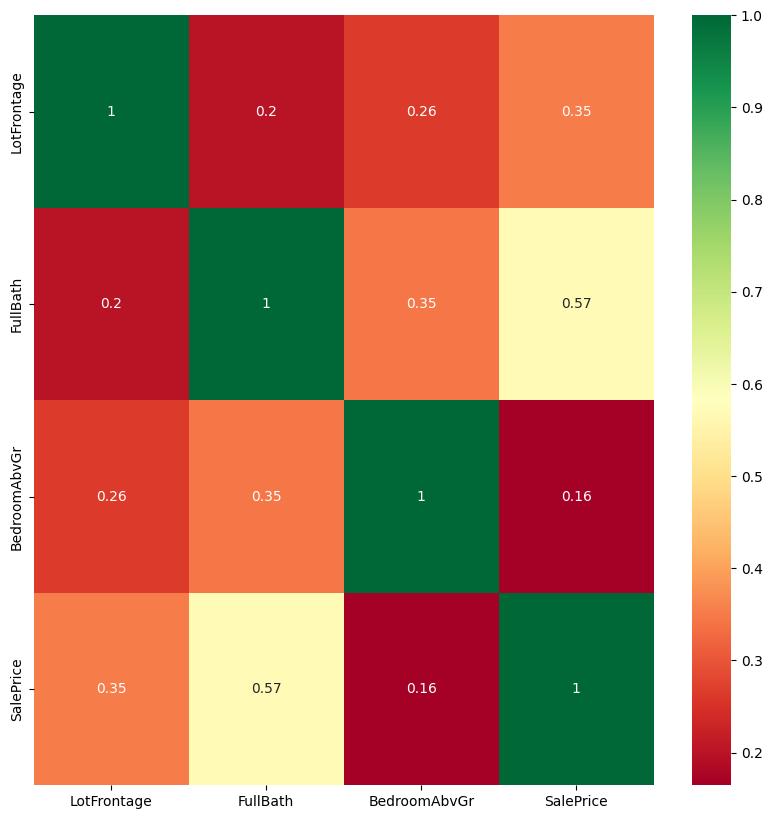

In [367]:
# get those 10 predictor variables's column name
col_name = corr_target.keys()

# get the correlation coefficient
corr_map = train_numerical[col_name].corr()

# plot the heat map
plt.figure(figsize=(10,10))
g = sns.heatmap(corr_map,annot=True,cmap="RdYlGn")

In [368]:
# get the predictor and target variable column name
col_name = ['BedroomAbvGr', 'FullBath', 'LotFrontage','SalePrice']

# check the missing data
train[col_name].isnull().sum()

BedroomAbvGr    0
FullBath        0
LotFrontage     0
SalePrice       0
dtype: int64

In [369]:
new_data = train[col_name]

<Axes: xlabel='BedroomAbvGr', ylabel='SalePrice'>

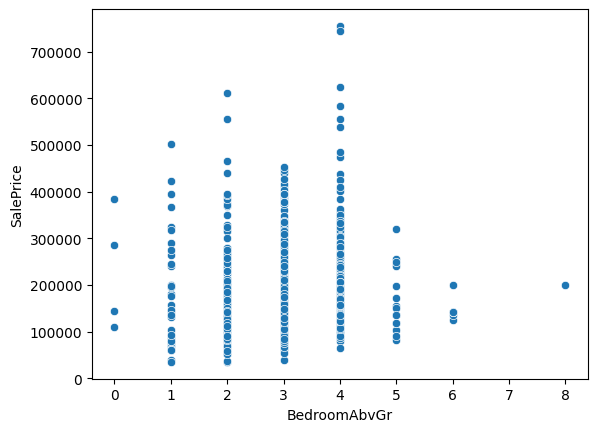

In [370]:
sns.scatterplot(x=new_data['BedroomAbvGr'], y=new_data['SalePrice'])

<Axes: xlabel='FullBath', ylabel='SalePrice'>

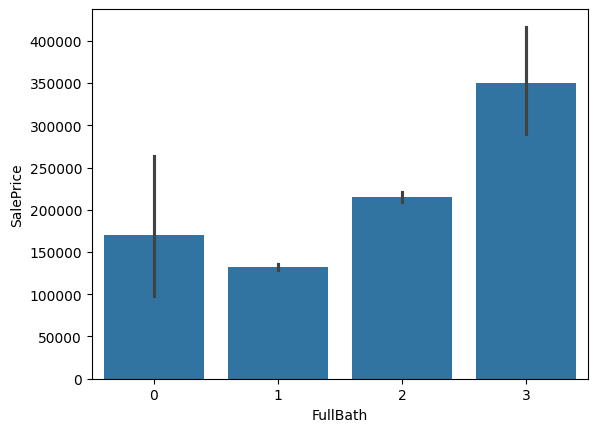

In [371]:
sns.barplot(x=new_data['FullBath'], y=new_data['SalePrice'])

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

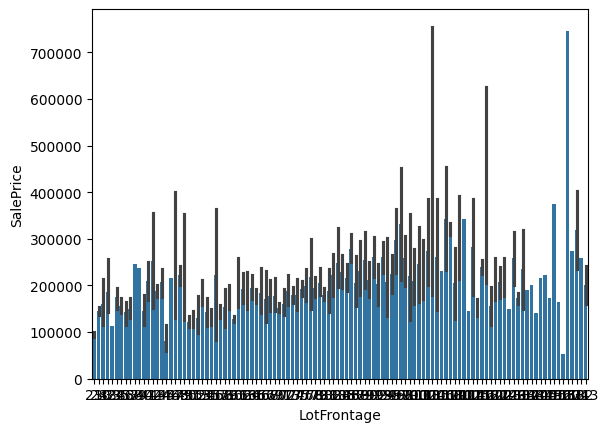

In [372]:
sns.barplot(x=new_data['LotFrontage'], y=new_data['SalePrice'])

In [373]:
# seperate the predictor and target variable
X_train = new_data.drop(['SalePrice'], axis=1)
Y_train = new_data['SalePrice']

# split the dataset
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.3, random_state=570)

In [374]:
# create an instance
lr = LinearRegression()

# fit the linear model
lr.fit(X_train,Y_train)

# predict 'SalePrice' from validation data
Y_predict = lr.predict(X_val)

# Calculate RMSE manually
rmse = np.sqrt(np.mean((Y_val - Y_predict) ** 2))
print(rmse)

53147.57773601037


In [375]:
# get the predictor variable from test dataset
X_test = test[['BedroomAbvGr', 'FullBath', 'LotFrontage']]

In [376]:
# check the missing value
X_test.isnull().sum()

BedroomAbvGr    0
FullBath        0
LotFrontage     0
dtype: int64

In [377]:
# predict the 'SalePrice' using test data
Y_test = lr.predict(X_test)

# create a submission file
submission = pd.DataFrame({'Id':test['Id'], 'SalePrice':Y_test})

# save the submission file
submission.to_csv('mysubmission.csv', index=False)

In [378]:
submission

,Id,SalePrice
0,1461,154426.596389
1,1462,143262.875347
2,1463,222393.293282
3,1464,226121.420936
4,1465,205596.056919
...,...,...
1227,2915,87340.960537
1228,2916,87340.960537
1229,2917,204797.643558
1230,2918,125554.268991
